# 1.Setup

In [40]:
import pandas as pd
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from scipy.sparse import hstack
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import randint
# import roc_curve, roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# from google.colab import drive
# drive.mount('/content/drive')

# 2.Load Dataset

In [42]:
file_path = r"E:\My Drive\Indonesia AI\Fundamental NLP\Project 1\Data_Processed\tweet_bersih.csv"
df = pd.read_csv(file_path)

# 3.Persiapan Modelling

In [43]:
X = df['tweet_bersih']
y = df['sentimen']

In [44]:
sentiment_label_to_int = {'negatif': 0, 'netral': 1, 'positif': 2}
y_numeric = y.map(sentiment_label_to_int)
y_categorical = to_categorical(y_numeric, num_classes=3)


In [45]:
# --- FEATURE ENGINEERING ---
# 1. Membuat fitur dari teks (TF-IDF)
vectorizer = TfidfVectorizer(max_features=800, min_df=3, ngram_range=(1, 3))
X_tfidf = vectorizer.fit_transform(df['tweet_bersih'])

# 2. Membuat fitur 'ada_tanda_tanya'
X_feature_tanya = df['tweet_bersih'].apply(lambda x: 1 if '?' in str(x) else 0)

# --- PENGGABUNGAN FITUR ✨---
# Menggabungkan matriks TF-IDF dengan fitur baru kita.
# .values.reshape(-1, 1) mengubah pandas Series menjadi format yang benar untuk digabungkan.
X = hstack([X_tfidf, X_feature_tanya.values.reshape(-1,1)])

# --- MENDEFINISIKAN TARGET ---
y = df['sentimen']

# --- SELESAI PREPROCESSING ---
print("✅ Tahap Preprocessing Selesai!")
print(f"Bentuk (shape) matriks fitur X final: {X.shape}")
print(f"Bentuk (shape) target y final: {y.shape}")

# --- SPLITTING DATA ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
print(f'\nUkuran data latih(X_train): {X_train.shape[0]}')
print(f'Ukuran data uji(X_test): {X_test.shape[0]}')

✅ Tahap Preprocessing Selesai!
Bentuk (shape) matriks fitur X final: (1815, 801)
Bentuk (shape) target y final: (1815,)

Ukuran data latih(X_train): 1452
Ukuran data uji(X_test): 363


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=16, stratify=y)

In [47]:
print(f'Ukuran data latih(X_train): {X_train.shape[0]}')
print(f'Ukuran data uji(X_test): {X_test.shape[0]}')

Ukuran data latih(X_train): 1542
Ukuran data uji(X_test): 273


# 4.Membuat Pipeline & Training Model

In [48]:
model_pipeline = RandomForestClassifier(max_depth=100, min_samples_leaf=1, min_samples_split=10, random_state=16)


In [49]:
# Latih model dengan data training
print("Memulai training model Random Forest...")
model_pipeline.fit(X_train, y_train)
print("Training selesai!")


Memulai training model Random Forest...
Training selesai!


In [50]:
y_pred_rf = model_pipeline.predict(X_test)
y_train_pred = model_pipeline.predict(X_train)

# 5.Evaluation


--- Hasil Evaluasi Model Random Forest ---
Akurasi: 0.6154
Akurasi pada data latih: 0.9695

Laporan Klasifikasi:
              precision    recall  f1-score   support

     negatif       0.63      0.62      0.63        90
      netral       0.60      0.70      0.65        91
     positif       0.62      0.52      0.57        92

    accuracy                           0.62       273
   macro avg       0.62      0.62      0.61       273
weighted avg       0.62      0.62      0.61       273


Confusion Matrix:


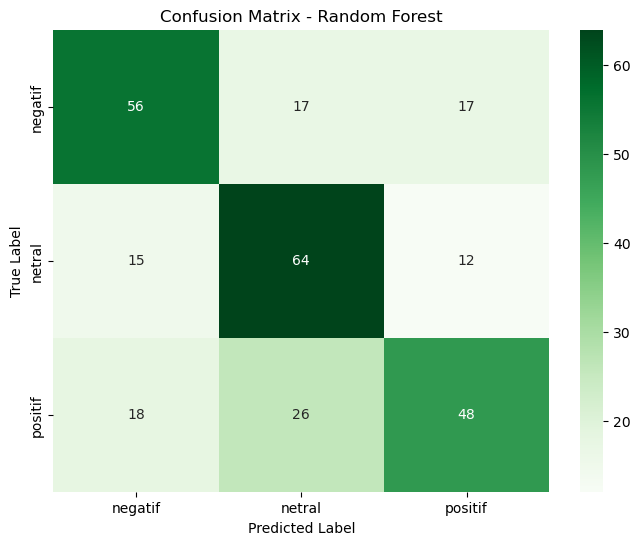

In [51]:
# 6. Melakukan Prediksi pada Data Test
y_pred_rf = model_pipeline.predict(X_test)
y_train_pred = model_pipeline.predict(X_train)

# 7. Mengevaluasi Performa Model
print("\n--- Hasil Evaluasi Model Random Forest ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Akurasi pada data latih: {accuracy_score(y_train, y_train_pred):.4f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf))

# Membuat dan menampilkan Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=model_pipeline.classes_, yticklabels=model_pipeline.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()